In [1]:
import pandas as pd
import numpy as np


In [2]:
train_data = pd.read_csv('/107.89N.csv')
test_data =pd.read_csv('/112.75N.csv')

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# Step 2: Define the Time Series Conversion Function
def time_series_conversion(df, t=1):
    data = df.copy()

    for i in range(1, t+1):
        temp = df['strain(micro)'].shift(i)  # 'strain(micro)' column represents the strain
        data[f'Strain_Lag_{i}'] = temp

    return data.dropna()


In [4]:
scaler = MinMaxScaler()

# Scale the features in train_data and test_data
train_data_scaled = scaler.fit_transform(train_data.drop(columns=['F']))
test_data_scaled = scaler.transform(test_data.drop(columns=['F']))


In [5]:


# Step 2: Apply Time Series Conversion
t = 1  # Set the time lag
train_data_converted = time_series_conversion(train_data, t=t)
test_data_converted = time_series_conversion(test_data, t=t)

# Step 3: Data Splitting
X_train = train_data_converted.drop(columns=['F'])  # Features without the 'F' column
y_train = train_data_converted['F']  # Target is the 'F' column

X_test = test_data_converted.drop(columns=['F'])
y_test = test_data_converted['F']


In [6]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data features
X_train = scaler.fit_transform(X_train)

# Transform the test data features using the same scaler
X_test= scaler.transform(X_test)

# Now you have normalized X_train_scaled and X_test_scaled for features

# Initialize another MinMaxScaler for target variable
target_scaler = MinMaxScaler()

# Fit and transform the scaler on the training data target
y_train = target_scaler.fit_transform(y_train.values.reshape(-1, 1))

# Transform the test data target using the same scaler
y_test= target_scaler.transform(y_test.values.reshape(-1, 1))

In [7]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [8]:
y_pred = model.predict(X_test)

# Step 6: Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 0.006252560571073772


In [9]:
from sklearn.metrics import mean_squared_error

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.006252560571073772


In [10]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")



Root Mean Squared Error: 0.07907313431927289


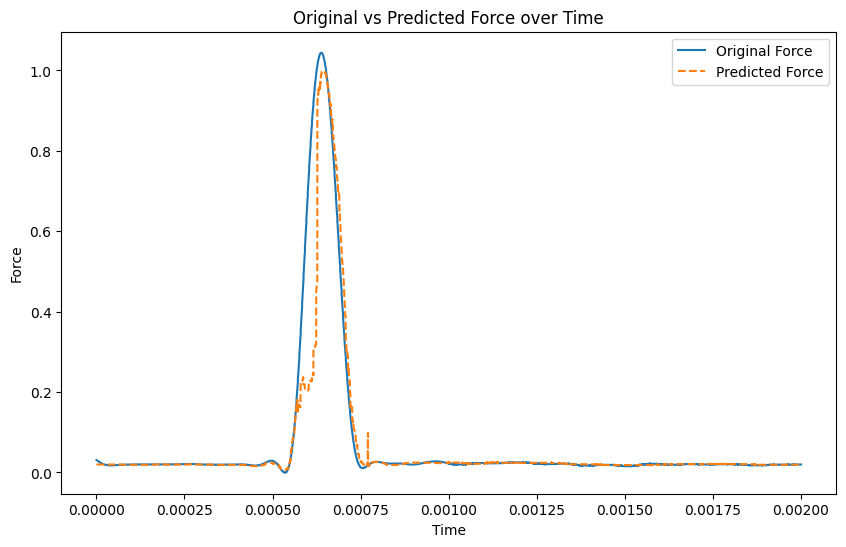

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(test_data_converted['time '], y_test, label='Original Force')
plt.plot(test_data_converted['time '], y_pred, label='Predicted Force', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Force')
plt.title('Original vs Predicted Force over Time')
plt.legend()
plt.show()
